In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import tensorflow_datasets as tfds

In [5]:
imdb,info=tfds.load('imdb_reviews',with_info=True,as_supervised=True)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [6]:
train=imdb['train']
test=imdb['test']

In [7]:
train_sequences=[]
train_labels=[]
test_sequences=[]
test_labels=[]
for s,l in train:
    train_sequences.append(s.numpy().decode('utf-8'))
    train_labels.append(l.numpy())
for s,l in train:
    test_sequences.append(s.numpy().decode('utf-8'))
    test_labels.append(l.numpy())


2023-06-12 14:45:38.471070: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [8]:
train_l=np.array(train_labels)
test_l=np.array(test_labels)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
vocab_size=1000
max_len=120
embedding_dim=16


In [11]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token='<oov>')
tokenizer.fit_on_texts(train_sequences)
word_index=tokenizer.word_index
train_sequence=tokenizer.texts_to_sequences(train_sequences)
train_pad=pad_sequences(train_sequence,truncating='post',maxlen=max_len)
test_sequence=tokenizer.texts_to_sequences(test_sequences)
test_pad=pad_sequences(test_sequence,truncating='post',maxlen=max_len)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM

In [13]:
model=Sequential()
model.add(Embedding(vocab_size,embedding_dim,input_shape=[max_len]))
model.add(LSTM(100))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 lstm (LSTM)                 (None, 100)               46800     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 63,413
Trainable params: 63,413
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(train_pad,train_l,validation_data=[test_pad,test_l],epochs=10)

Epoch 1/10
782/782 [==============================] - 30s 35ms/step - loss: 0.5726 - accuracy: 0.6944 - val_loss: 0.4247 - val_accuracy: 0.8144
Epoch 2/10
782/782 [==============================] - 25s 32ms/step - loss: 0.4511 - accuracy: 0.7964 - val_loss: 0.4045 - val_accuracy: 0.8156
Epoch 3/10
782/782 [==============================] - 26s 33ms/step - loss: 0.4202 - accuracy: 0.8135 - val_loss: 0.4010 - val_accuracy: 0.8278
Epoch 4/10
782/782 [==============================] - 26s 33ms/step - loss: 0.4074 - accuracy: 0.8192 - val_loss: 0.3783 - val_accuracy: 0.8379
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 0.3938 - accuracy: 0.8240 - val_loss: 0.3602 - val_accuracy: 0.8409
Epoch 6/10
782/782 [==============================] - 26s 33ms/step - loss: 0.3856 - accuracy: 0.8282 - val_loss: 0.3481 - val_accuracy: 0.8501
Epoch 7/10
782/782 [==============================] - 65s 83ms/step - loss: 0.3690 - accuracy: 0.8357 - val_loss: 0.3597 - val_accuracy:

In [16]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

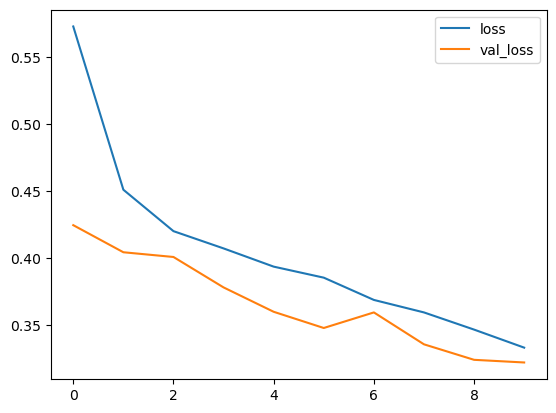

In [17]:
metrics[['loss','val_loss']].plot()

<Axes: >

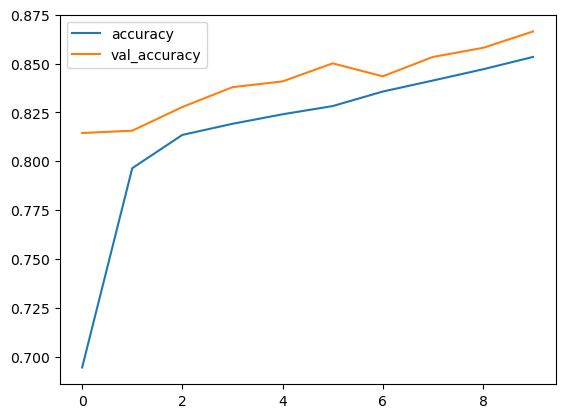

In [18]:
metrics[['accuracy','val_accuracy']].plot()

In [19]:
predictions=(model.predict(test_pad)>0.5).astype(int)

782/782 [==============================] - 7s 8ms/step


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

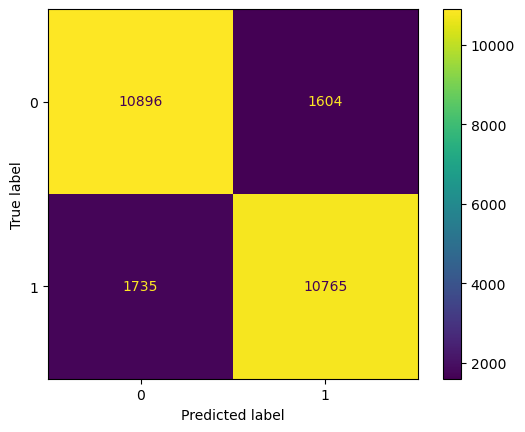

In [23]:
ConfusionMatrixDisplay.from_predictions(test_l,predictions)